# Sample model using Keras with TF backend

Welcome to the course!

This is an introduction lession to help you understand few key starting points using Keras. We are using tensorflow(default) as our backend, but you can use 'theano' or 'CNTK'.

In [881]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [882]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

Good to be in the latest version of Keras. 

In [883]:
keras.__version__

'2.1.5'

In [884]:
train_labels = []
train_samples = []

## Generated Data

1. An experiemental drug was tested on individuals from age 13 to 100.
2. The trial had 2100 participants. Half were below 65 years, half were above 65 years old.
3. 95% of patients 65 or older experienced side effects.
4. 95% of patients under 65 expereinced no side effects.

In [885]:
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

    

In [886]:
# Display raw data
for i in train_samples:
    print(i)

51
79
16
99
45
67
28
73
47
68
61
81
38
75
36
74
61
86
28
76
63
95
44
72
27
78
34
84
38
91
25
83
29
95
26
90
29
73
14
69
14
80
21
80
46
95
58
77
39
79
20
88
32
94
58
79
14
99
45
89
51
72
15
90
16
67
26
78
43
97
30
82
43
83
62
90
61
69
62
78
30
78
26
75
30
74
19
84
34
93
29
80
42
69
29
71
45
88
15
67
50
82
44
91
56
78
37
82
49
82
50
97
60
94
50
74
38
94
19
97
57
66
45
74
58
80
24
83
37
76
45
84
56
87
55
74
38
78
26
95
44
99
30
69
28
87
50
93
58
98
57
100
21
74
17
87
61
88
14
91
44
88
44
67
60
87
23
84
23
77
48
86
62
76
32
88
20
74
60
70
64
79
59
82
18
78
21
97
41
65
34
74
19
76
30
74
62
76
40
94
16
73
16
96
24
73
32
82
15
67
33
69
47
99
53
78
52
83
63
83
57
69
29
99
20
82
31
72
25
94
49
86
38
74
25
65
60
100
40
93
48
67
17
93
59
82
32
88
22
95
15
99
47
75
16
94
62
81
27
83
18
88
28
94
62
69
44
85
25
71
47
86
24
89
64
93
31
74
47
87
13
77
51
76
57
80
36
75
29
80
54
78
46
97
64
90
22
87
63
67
44
78
22
87
39
81
23
91
59
74
24
85
27
92
58
78
14
77
58
72
31
71
27
92
59
73
43
95
18
78
32
71
39

In [887]:
# Display raw data
for i in train_labels:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


## Data tranformation

We cannot fed the raw data to the network, it needs to be transfored to make it normalized and standardized. 

In [888]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1, 1))


In [889]:
# Display scaled data
for i in scaled_train_samples:
    print (i)

[0.43678161]
[0.75862069]
[0.03448276]
[0.98850575]
[0.36781609]
[0.62068966]
[0.17241379]
[0.68965517]
[0.3908046]
[0.63218391]
[0.55172414]
[0.7816092]
[0.28735632]
[0.71264368]
[0.26436782]
[0.70114943]
[0.55172414]
[0.83908046]
[0.17241379]
[0.72413793]
[0.57471264]
[0.94252874]
[0.35632184]
[0.67816092]
[0.16091954]
[0.74712644]
[0.24137931]
[0.81609195]
[0.28735632]
[0.89655172]
[0.13793103]
[0.8045977]
[0.18390805]
[0.94252874]
[0.14942529]
[0.88505747]
[0.18390805]
[0.68965517]
[0.01149425]
[0.64367816]
[0.01149425]
[0.77011494]
[0.09195402]
[0.77011494]
[0.37931034]
[0.94252874]
[0.51724138]
[0.73563218]
[0.29885057]
[0.75862069]
[0.08045977]
[0.86206897]
[0.2183908]
[0.93103448]
[0.51724138]
[0.75862069]
[0.01149425]
[0.98850575]
[0.36781609]
[0.87356322]
[0.43678161]
[0.67816092]
[0.02298851]
[0.88505747]
[0.03448276]
[0.62068966]
[0.14942529]
[0.74712644]
[0.34482759]
[0.96551724]
[0.1954023]
[0.79310345]
[0.34482759]
[0.8045977]
[0.56321839]
[0.88505747]
[0.55172414]
[0.64

[0.95402299]
[0.13793103]
[0.72413793]
[0.28735632]
[0.6091954]
[0.34482759]
[0.98850575]
[0.28735632]
[0.70114943]
[0.28735632]
[0.73563218]
[0.4137931]
[0.65517241]
[0.18390805]
[0.68965517]
[0.1954023]
[0.72413793]
[0.10344828]
[0.77011494]
[0.29885057]
[0.66666667]
[0.11494253]
[0.79310345]
[0.5862069]
[0.83908046]
[0.28735632]
[0.71264368]
[0.32183908]
[0.89655172]
[0.3908046]
[0.96551724]
[0.35632184]
[0.91954023]
[0.45977011]
[0.85057471]
[0.1954023]
[0.93103448]
[0.13793103]
[0.86206897]
[0.05747126]
[0.88505747]
[0.44827586]
[0.85057471]
[0.33333333]
[0.6091954]
[0.22988506]
[0.93103448]
[0.33333333]
[0.68965517]
[0.17241379]
[0.88505747]
[0.31034483]
[0.66666667]
[0.50574713]
[0.81609195]
[0.5862069]
[0.97701149]
[0.34482759]
[1.]
[0.13793103]
[0.67816092]
[0.44827586]
[0.82758621]
[0.45977011]
[0.79310345]
[0.18390805]
[0.94252874]
[0.25287356]
[0.7816092]
[0.08045977]
[0.81609195]
[0.04597701]
[0.6091954]
[0.17241379]
[0.77011494]
[0.11494253]
[0.95402299]
[0.49425287]
[0.9

[0.73563218]
[0.56321839]
[0.74712644]
[0.28735632]
[0.85057471]
[0.54022989]
[0.73563218]
[0.26436782]
[0.66666667]
[0.35632184]
[0.73563218]
[0.11494253]
[0.73563218]
[0.54022989]
[0.73563218]
[0.13793103]
[0.94252874]
[0.02298851]
[0.66666667]
[0.45977011]
[0.90804598]
[0.37931034]
[0.75862069]
[0.50574713]
[1.]
[0.25287356]
[0.75862069]
[0.08045977]
[0.96551724]
[0.18390805]
[0.64367816]
[0.36781609]
[0.73563218]
[0.33333333]
[0.81609195]
[0.16091954]
[0.88505747]
[0.09195402]
[0.81609195]
[0.54022989]
[0.83908046]
[0.10344828]
[0.66666667]
[0.51724138]
[0.89655172]
[0.36781609]
[0.97701149]
[0.2183908]
[0.83908046]
[0.28735632]
[0.88505747]
[0.12643678]
[0.65517241]
[0.02298851]
[0.74712644]
[0.54022989]
[0.6091954]
[0.25287356]
[0.85057471]
[0.18390805]
[0.83908046]
[0.22988506]
[1.]
[0.27586207]
[0.63218391]
[0.54022989]
[0.97701149]
[0.24137931]
[0.83908046]
[0.16091954]
[0.96551724]
[0.20689655]
[0.74712644]
[0.4137931]
[0.67816092]
[0.35632184]
[0.90804598]
[0.20689655]
[0.71

To visualize the model/graph, model.summary() can give you the summary of the architecture output.  

In [890]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


In [891]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_119 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_120 (Dense)            (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Configures the model for training.

Now, that our model/grpah is ready, we can run optimizer and we are going to use Adam.

**Optimizers:** Most of the well know optimzers can be found [here](http://ruder.io/optimizing-gradient-descent/).

**Loss Function:** Find most of the loss function [here](https://isaacchanghau.github.io/2017/06/07/Loss-Functions-in-Artificial-Neural-Networks/). 

In [892]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Validation set

Validation set can be given either as a seperate set or let Keras split the validation set from testing set. 

In [893]:
#valid_set = [(sample, label), (sample, label), (sample, label)]
#model.fit(scaled_train_samples, train_labels, validation_data=valid_set, batch_size=10, epochs=20, shuffle=True, verbose=2)

## To start the training,
We have to call fit(), Validation_split will split the training data and put x% of the images into validation set.

Let us play a bit! 

**validation_split**: splits the training data randomly into two parts, trianing and validation based on the percentage specified. DISCLAIMER: this is not recommended practise, avoid doing this on the production network, another important tip, avoid augementing validation data. 

Play time!!!
change validation precentage and see the difference. This will give you intution about how data is fit/overfit/underfit.

In [894]:
model.fit(scaled_train_samples, train_labels, validation_split=0.4, batch_size=10, epochs=2, shuffle=True, verbose=2)

Train on 1260 samples, validate on 840 samples
Epoch 1/2
 - 3s - loss: 0.6595 - acc: 0.5294 - val_loss: 0.6622 - val_acc: 0.5429
Epoch 2/2
 - 0s - loss: 0.6420 - acc: 0.5889 - val_loss: 0.6489 - val_acc: 0.5821


## Save Model



In [895]:
model.save('sample_model.h5')

This save() function save following:

    1. The architecture of the model, allowing to create the model.
    2. The weights of the model.
    3. The training configuration of the model (loss, optimizer).
    4. The state of the optimizer, allowing training to resume from where you left before.

## Load Model

In [896]:
from keras.models import load_model
new_model = load_model('sample_model.h5')

In [897]:
new_model.summary()
new_model.get_weights()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_119 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_120 (Dense)            (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


[array([[-0.586595  , -0.46621054,  0.443786  ,  0.32186496, -0.17207956,
         -0.49266118,  0.09179825,  0.1015697 , -0.27216208,  0.2086149 ,
          0.29602507,  0.3366687 ,  0.09421758,  0.36156753, -0.33434635,
          0.33421287]], dtype=float32),
 array([ 0.        ,  0.        , -0.00658541, -0.00702514,  0.        ,
         0.        ,  0.00458607, -0.00264297,  0.        ,  0.00473052,
         0.00929479, -0.00546438, -0.00765639,  0.00366664,  0.        ,
        -0.00649972], dtype=float32),
 array([[ 0.19961396, -0.07677612, -0.00619608, -0.11975352,  0.03183892,
          0.20960459, -0.16488428,  0.0870313 , -0.2932758 , -0.08879659,
         -0.23809041, -0.00125259,  0.07466745, -0.06990981, -0.18690981,
          0.06212866, -0.04596224,  0.22142014,  0.11385515,  0.03058648,
         -0.15260994, -0.15262023,  0.04544249, -0.10179594,  0.01271123,
          0.03993118,  0.28706226,  0.02993858, -0.31100756,  0.07237169,
         -0.08200893,  0.10618207],
 

## Predict

Create a test set and use that to test the model.

In [898]:
test_labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
test_samples = [15, 30, 45, 60, 64, 68, 70, 72, 75, 80]

test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = test_scaler.fit_transform((test_samples).reshape(-1, 1))

predictions = model.predict(scaled_test_samples, verbose=1, steps=1)

1/1 [==============================] - 1s 844ms/step


In [899]:
predictions

array([[0.51073605, 0.48926395],
       [0.48526496, 0.51473504],
       [0.4535114 , 0.54648864],
       [0.42230022, 0.5776997 ],
       [0.4141031 , 0.5858969 ],
       [0.40595323, 0.5940468 ],
       [0.40189734, 0.5981026 ],
       [0.39785486, 0.60214514],
       [0.39199492, 0.6080051 ],
       [0.38234082, 0.6176592 ]], dtype=float32)

In [900]:
for i in predictions:
    print(i)

[0.51073605 0.48926395]
[0.48526496 0.51473504]
[0.4535114  0.54648864]
[0.42230022 0.5776997 ]
[0.4141031 0.5858969]
[0.40595323 0.5940468 ]
[0.40189734 0.5981026 ]
[0.39785486 0.60214514]
[0.39199492 0.6080051 ]
[0.38234082 0.6176592 ]


## Confusion Matrix

In [901]:
cm_plot_labels = ['effect', 'no-effect']
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [902]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4 1]
 [5 0]]


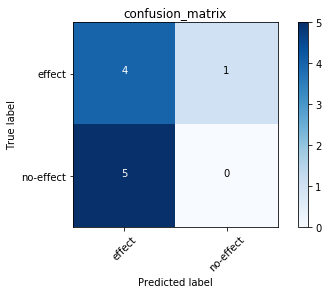

In [903]:
plot_confusion_matrix(cm, cm_plot_labels, title='confusion_matrix')